# TTim: compute per log time interval

Import packages

In [1]:
import sys

import matplotlib.pyplot as plt
import numpy as np
from scipy.special import exp1

use_fork = True
if use_fork:
    sys.path.insert(1, "../..")
import ttim

# check which ttim
print("ttim:", ttim.__file__)

ttim: /home/david/github/ttim_db/docs/03examples/../../ttim/__init__.py


Compare to analytical Theis solution.

In [2]:
def theis(r, t, T, S, Q):
    u = r**2 * S / (4 * T * t)
    h = -Q / (4 * np.pi * T) * exp1(u)
    return h


def theisQr(r, t, T, S, Q):
    u = r**2 * S / (4 * T * t)
    return -Q / (2 * np.pi) * np.exp(-u) / r


Model parameters

In [3]:
T = 500
S = 1e-4
t = np.logspace(-5, 0, 11)
r = 30
Q = 788

In [4]:
htheis = theis(r, t, T, S, Q)
Qrtheis = theisQr(r, t, T, S, Q)

In [5]:
tmin = 1e-5
tmax = 1.0

ml = ttim.ModelMaq(kaq=25, z=[20, 0], Saq=S / 20, tmin=tmin, tmax=tmax)
w = ttim.Well(ml, tsandQ=[(0, Q)], rw=1e-5)
ml.solve()

self.neq  1
solution complete


/home/david/github/ttim_db/docs/03examples/../../ttim/aquifer.py:118: RuntimeWarning: divide by zero encountered in divide
  self.lab[t_int][:] = 1.0 / np.sqrt(self.eigval[t_int])
/home/david/github/ttim_db/docs/03examples/../../ttim/aquifer.py:118: RuntimeWarning: invalid value encountered in divide
  self.lab[t_int][:] = 1.0 / np.sqrt(self.eigval[t_int])


In [6]:
h = np.full_like(t, np.nan)
for i, ti in enumerate(t[:-1]):
    h[i] = ml.head(30, 0, ti).item()  # .item() to get scalar value

The TTim solution still matches the analytical Theis solution. 

Note that the final time could not be computed yet because the new implementation does not expand the time last time interval to contain `t=1.0`.

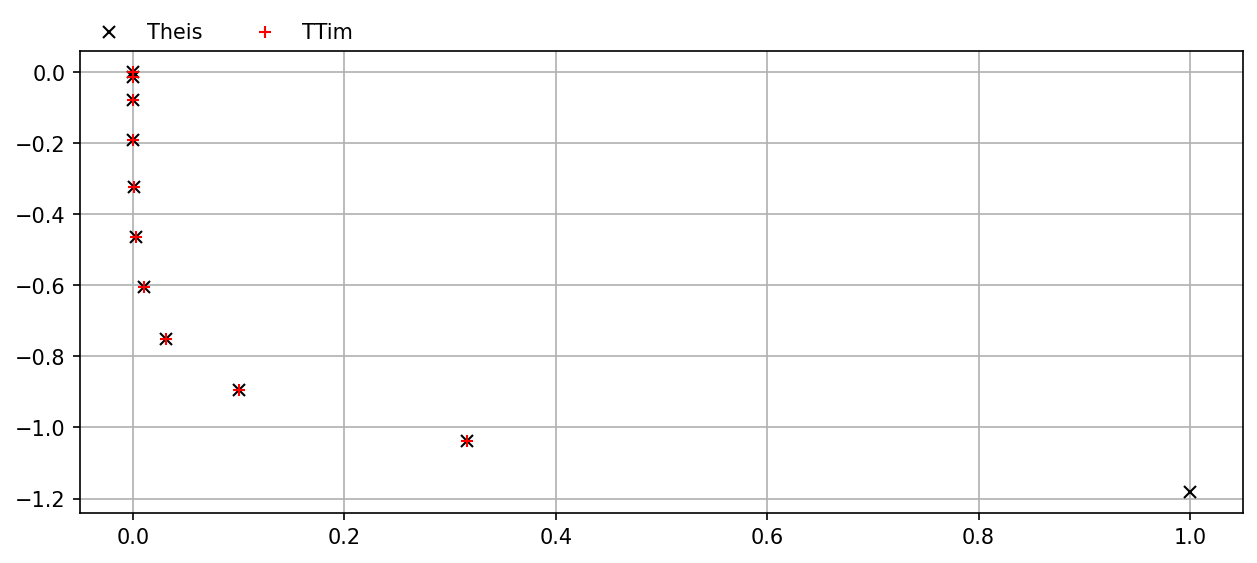

In [7]:
plt.subplots(1, 1, figsize=(10, 4), dpi=150)
plt.plot(t, htheis, "x", c="k", label="Theis")
plt.plot(t, h, "+", c="r", label="TTim")
plt.legend(loc=(0, 1), frameon=False, ncol=2)
plt.grid()

But this allows us to demonstrate a new feature. We can solve for a specific time interval using `ml.solve_interval()`. 

In [8]:
# solve interval
ml.solve_interval(0)
# compute head at time
h[-1] = ml.head(30, 0, t[-1]).item()

/home/david/github/ttim_db/docs/03examples/../../ttim/aquifer.py:118: RuntimeWarning: divide by zero encountered in divide
  self.lab[t_int][:] = 1.0 / np.sqrt(self.eigval[t_int])
/home/david/github/ttim_db/docs/03examples/../../ttim/aquifer.py:118: RuntimeWarning: invalid value encountered in divide
  self.lab[t_int][:] = 1.0 / np.sqrt(self.eigval[t_int])


Plot figure again.

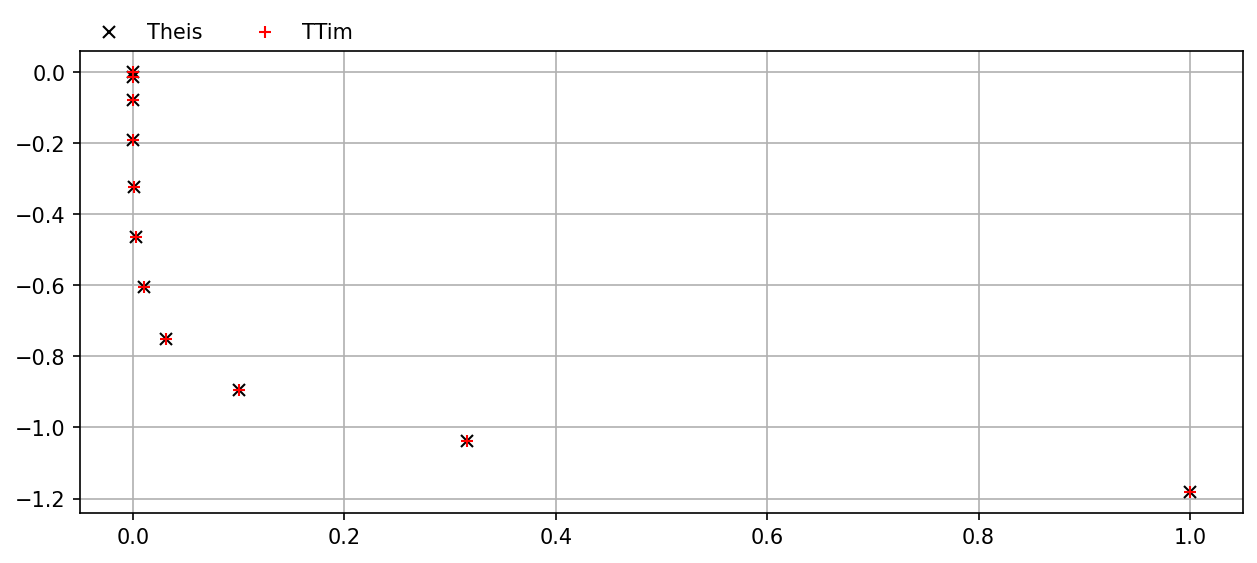

In [9]:
plt.subplots(1, 1, figsize=(10, 4), dpi=150)
plt.plot(t, htheis, "x", c="k", label="Theis")
plt.plot(t, h, "+", c="r", label="TTim")
plt.legend(loc=(0, 1), frameon=False, ncol=2)
plt.grid()

The differences:

In [10]:
h - htheis

array([ 6.62549481e-09, -2.41251873e-10, -1.16393181e-07, -3.76950610e-10,
       -8.99754447e-07, -1.57115954e-09,  2.15157714e-07, -2.90475188e-09,
        1.40846097e-06, -3.33867645e-09,  2.71269112e-06])